In [1]:
import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary

In [2]:
training_data = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testing_data = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))


In [3]:
batch_sizes = [5, 25, 50, 100, 200]

train_loaders = [torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True) for batch_size in batch_sizes]
test_loaders = [torch.utils.data.DataLoader(testing_data, batch_size=batch_size, shuffle=True) for batch_size in batch_sizes]


In [4]:
# 16640 Parameters
class NeuralNet1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 20)
        self.layer2 = nn.Linear(20, 30)
        self.layer3 = nn.Linear(30, 10)

    def forward(self, input_tensor):
        input_tensor = F.relu(self.layer1(input_tensor))
        input_tensor = F.relu(self.layer2(input_tensor))
        output_tensor = self.layer3(input_tensor)
        return output_tensor

# 16640 Parameters
class NeuralNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 20)
        self.layer2 = nn.Linear(20, 30)
        self.layer3 = nn.Linear(30, 10)

    def forward(self, input_tensor):
        input_tensor = F.relu(self.layer1(input_tensor))
        input_tensor = F.relu(self.layer2(input_tensor))
        output_tensor = self.layer3(input_tensor)
        return output_tensor

# 16640 Parameters
class NeuralNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 20)
        self.layer2 = nn.Linear(20, 30)
        self.layer3 = nn.Linear(30, 10)

    def forward(self, input_tensor):
        input_tensor = F.relu(self.layer1(input_tensor))
        input_tensor = F.relu(self.layer2(input_tensor))
        output_tensor = self.layer3(input_tensor)
        return output_tensor

# 16640 Parameters
class NeuralNet4(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 20)
        self.layer2 = nn.Linear(20, 30)
        self.layer3 = nn.Linear(30, 10)

    def forward(self, input_tensor):
        input_tensor = F.relu(self.layer1(input_tensor))
        input_tensor = F.relu(self.layer2(input_tensor))
        output_tensor = self.layer3(input_tensor)
        return output_tensor

# 16640 Parameters
class NeuralNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 20)
        self.layer2 = nn.Linear(20, 30)
        self.layer3 = nn.Linear(30, 10)

    def forward(self, input_tensor):
        input_tensor = F.relu(self.layer1(input_tensor))
        input_tensor = F.relu(self.layer2(input_tensor))
        output_tensor = self.layer3(input_tensor)
        return output_tensor



In [5]:
models = [NeuralNet1(), NeuralNet2(), NeuralNet3(), NeuralNet4(), NeuralNet5()]
optimizers = [optim.SGD(model.parameters(), lr=0.001) for model in models]
loss_function = nn.CrossEntropyLoss()

for model in models:
    summary(model, (28 * 28,))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]          15,700
            Linear-2                   [-1, 30]             630
            Linear-3                   [-1, 10]             310
Total params: 16,640
Trainable params: 16,640
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.07
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]          15,700
            Linear-2                   [-1, 30]             630
            Linear-3                   [-1, 10]             310
Total params: 16,640
Trainable params: 16,6

In [6]:
EPOCHS = 50

for epoch in range(EPOCHS):
    print(f"Epoch: {epoch + 1}")

    for model, optimizer, loader in zip(models, optimizers, train_loaders):
        model.train()

        for images, labels in loader:
            optimizer.zero_grad()
            output = model(images.view(-1, 784))
            loss = loss_function(output, labels)
            loss.backward()
            optimizer.step()


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50


In [8]:
def compute_metrics(model, data_loader, loss_function):
    correct_predictions = 0
    total_samples = 0
    total_loss = 0
    loss_counter = 0

    with torch.no_grad():
        for batch in data_loader:
            images, labels = batch
            outputs = model(images.view(-1, 784))
            loss = loss_function(outputs, labels)
            total_loss += loss.detach().numpy()
            loss_counter += 1

            for i, output in enumerate(outputs):
                if torch.argmax(output) == labels[i]:
                    correct_predictions += 1
                total_samples += 1

    return total_loss / loss_counter, round(correct_predictions / total_samples, 3)

train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []

# Calculate training metrics
for network, train_loader in zip(models, train_loaders):
    training_loss, training_accuracy = compute_metrics(network, train_loader, loss_function)
    train_loss_list.append(training_loss)
    train_accuracy_list.append(training_accuracy)

# Calculate testing metrics
for network, test_loader in zip(models, test_loaders):
    testing_loss, testing_accuracy = compute_metrics(network, test_loader, loss_function)
    test_loss_list.append(testing_loss)
    test_accuracy_list.append(testing_accuracy)


In [10]:
def compute_sensitivity(network):
    sensitivity_values = []

    for param in network.parameters():
        if param.grad is not None:
            gradient_norm = torch.linalg.norm(param.grad).numpy()
            sensitivity_values.append(gradient_norm)

    return sum(sensitivity_values) / len(sensitivity_values) if sensitivity_values else 0

sensitivity_list = [compute_sensitivity(network) for network in models]


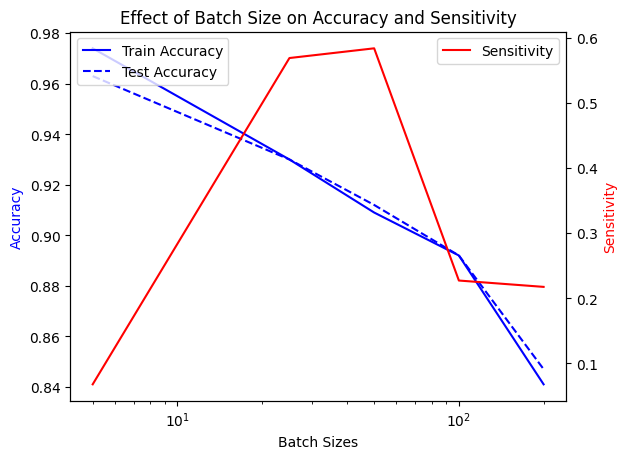

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(batch_sizes, train_accuracy_list, 'b', label='Train Accuracy')
ax1.plot(batch_sizes, test_accuracy_list, 'b--', label='Test Accuracy')

ax2.plot(batch_sizes, sensitivity_list, 'r', label='Sensitivity')

ax1.set_title('Effect of Batch Size on Accuracy and Sensitivity')
ax1.set_xlabel('Batch Sizes')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy', color='b')
ax2.set_ylabel('Sensitivity', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


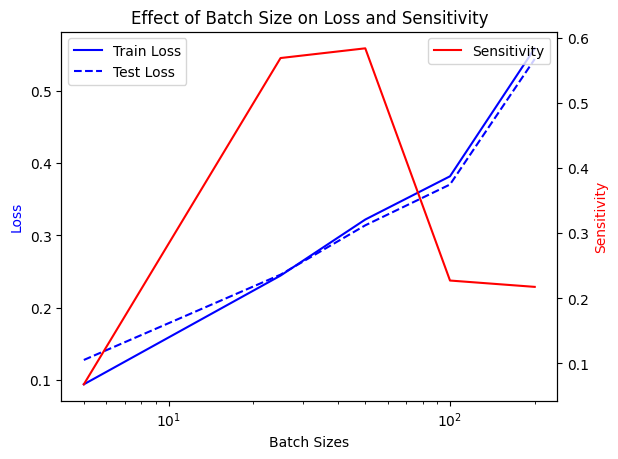

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(batch_sizes, train_loss_list, 'b', label='Train Loss')
ax1.plot(batch_sizes, test_loss_list, 'b--', label='Test Loss')

ax2.plot(batch_sizes, sensitivity_list, 'r', label='Sensitivity')

ax1.set_title('Effect of Batch Size on Loss and Sensitivity')
ax1.set_xlabel('Batch Sizes')
ax1.set_xscale('log')
ax1.set_ylabel('Loss', color='b')
ax2.set_ylabel('Sensitivity', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
